In [1]:
# 필수 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

titan_df = pd.read_csv('./titanic/train.csv', engine='python')
titan_df.head(3)

print('\n ###학습 데이터 정보###\n')
print(titan_df.info())

titan_df.Age.fillna(titan_df.Age.mean(), inplace=True)
titan_df.Cabin.fillna('N', inplace=True)
titan_df.Embarked.fillna('N', inplace=True)

print('데이터셋 Null 값 개수', titan_df.isnull().sum().sum())

# titan_df Cabin 분포 살펴보기
titan_df.Cabin.str[0].value_counts()


 ###학습 데이터 정보###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
데이터셋 Null 값 개수 0


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

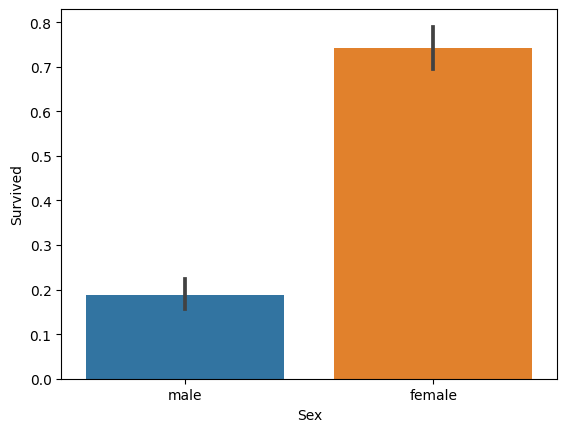

In [2]:
# 성별에 따른 생존률과의 관계
titan_df.groupby(['Sex','Survived'])['Survived'].count()

# 여성의 생존률
np.round(233/314,3)

# 남성의 생존률
np.round(109/(109+468),3)

# sns-seaborn을 통한 데이터 시각화 - 성별 vs 생존률
sns.barplot(x='Sex', y='Survived', data=titan_df)

In [3]:
'''
0~5세는 Baby
6~12세는 Child
13~18세는 Teenager
19~25세는 Student
26~35세는 Young Adult
36~60세는 Adult
61세 이상은 Elderly
'''

# 입력 age에 따라서 구분 값을 반환하는 함수 생성
# df의 apply lambda에 적용.
def get_cat(df_age):
    char = '' # 초기설정을 문자열로 했다.
    
    if df_age <=-1: char='unknown'
    elif df_age <=5: char='baby'
    elif df_age <=12: char='child'
    elif df_age <=18: char='teen'
    elif df_age <=25: char='student'
    elif df_age <=39: char= 'young_adult'
    elif df_age <=65: char= 'adult'
    else: char='elderly'
    
    return char

<AxesSubplot: xlabel='Age_cat', ylabel='Survived'>

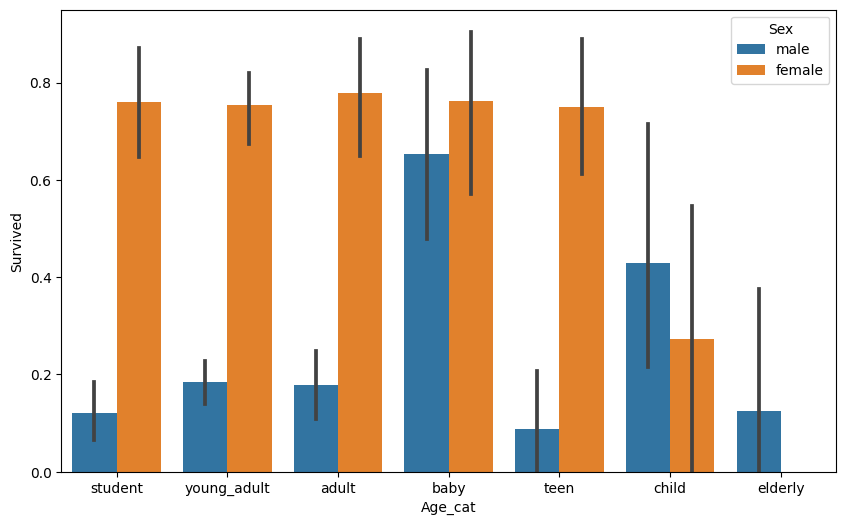

In [4]:
# 막대그래프의 크기 figure를 더 크게 설정- plt(matplotlib)
plt.figure(figsize=(10,6))

# X축의 값을 - get_cat(x)로 정의
titan_df['Age_cat'] = titan_df.Age.apply(lambda x: get_cat(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titan_df)

In [5]:
group_names = ['unknown', 'baby', 'child', 'teen', 'student', 'young_adult', 'adult', 'elderly']

In [7]:
titan_df1 = titan_df.drop(['Age_cat'], axis=1) 
titan_df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [11]:
# 인코딩 : 문자 -> 숫자

# step 1. 문자 색출
titan_df1.info()  # object 확인 1.
titan_df1.select_dtypes(include=object).columns  # object 확인 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
# 인코딩
## 1. 레이블(정수) 인코딩
## 2. 원-핫 인코딩 :: pd.get_dummies()

# 1. 레이블(정수) 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
# titan_df1['Name'] = le.fit_transform(titan_df1['Name'])

In [20]:
from sklearn.preprocessing import LabelEncoder

ftrs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for ftr in ftrs:
#     print(titan_df1[ftr])
    
    le = LabelEncoder()  # 레이블 인코딩 객체화
    titan_df1[ftr] = le.fit_transform(titan_df1[ftr])

# 인코딩 반영된 데이터셋 호출
titan_df1

titan_df1.info()  # 이제 문자열 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [24]:
# ML(Machine Learning) 알고리즘에서 불필요한 속성(컬럼) 제거 :: 일반적으로 식별자 제거
titanic_df = titan_df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,3
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,3
3,1,1,0,35.000000,1,0,53.1000,3
4,0,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3
887,1,1,0,19.000000,0,0,30.0000,3
888,0,3,0,29.699118,1,2,23.4500,3
889,1,1,1,26.000000,0,0,30.0000,0


In [22]:
# 원본 데이터에는 결측값이 존재함.
pd.read_csv('./titanic/test.csv').isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
# 최종본에는 결측값 없음.
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### EDA 전처리 함수화

In [26]:
# 그러나 ML 할 때, test와 train 데이터를 만들 때 지금까지 했던 전처리를 또 해야함.
# 그리고, 원래 데이터 'Fare'의 결측치를 초기에 발견하지 못할 확률이 높음. 그러면 ML 돌릴 때 오류가 남.
# 따라서, 지금까지의 과정을 '함수화' 시켜보자!

### 함수화
## 1) 결측치 <- 대체
# Na 처리 함수
def fill_null(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)  # 평균값 대체
    df['Fare'].fillna(0, inplace=True)  # 최소값 대체
    df['Cabin'].fillna('N', inplace=True)  # 'N'으로 변경
    df['Embarked'].fillna('N', inplace=True)  # 'N'으로 변경
    
    return df

## 2) 문자 -> 숫자
from sklearn.preprocessing import LabelEncoder

def le_ftrs(df):
    ftrs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    
    for ftr in ftrs:
        le = LabelEncoder()  # 레이블 인코딩 객체화
        df[ftr] = le.fit_transform(df[ftr])
    
    return df

## 3) 불필요 속성 제거
def drop_ftrs(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

    return df

In [27]:
## 4) = 1) + 2) + 3) 함수화
def pre_all_ftrs(df):
    
    df = fill_null(df)
    df = le_ftrs(df)
    df = drop_ftrs(df)
    
    return df

In [29]:
# 실행
# train 데이터
bef_titan = pd.read_csv('./titanic/train.csv')
pre_all_ftrs(bef_titan)
# train-test 쪼개서 학습 시키면 됨.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,3
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,3
3,1,1,0,35.000000,1,0,53.1000,3
4,0,3,1,35.000000,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3
887,1,1,0,19.000000,0,0,30.0000,3
888,0,3,0,29.699118,1,2,23.4500,3
889,1,1,1,26.000000,0,0,30.0000,0


In [30]:
after_titan = bef_titan.copy()

In [31]:
# test 데이터
bef_test = pd.read_csv('./titanic/test.csv')
pre_all_ftrs(bef_test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [32]:
# End-of-file